In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wgrywanie danych

In [37]:
dane = pd.read_csv("szpital.csv")
display(dane)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,40.2,13.9,4.76,12.1,206,29.2,34.6,84.5,52,M,out
1,36.5,12.6,4.32,5.1,152,29.2,34.5,84.5,46,F,out
2,36.7,12.2,3.64,9.0,152,33.5,33.2,100.8,87,F,in
3,33.7,11.8,3.74,9.9,251,31.6,35.0,90.1,25,F,in
4,40.9,12.9,4.99,5.3,132,25.9,31.5,82.0,17,F,in
...,...,...,...,...,...,...,...,...,...,...,...
3907,36.5,12.7,3.82,10.2,241,33.2,34.8,95.5,59,F,in
3908,46.6,15.4,5.37,4.5,170,28.7,33.0,86.8,20,M,out
3909,42.0,13.7,4.67,8.7,143,29.3,32.6,89.9,55,M,out
3910,38.4,13.0,4.41,17.4,302,29.5,33.9,87.1,57,M,in


# Wstępna analiza danych

Dane zawierają wyniki badań laboratoryjnych, wiek oraz płeć pacjentów szpitala wraz z informacją, czy mają oni kontynuować leczenie w szpitalu, czy poza nim.

In [17]:
dane.shape

(3912, 11)

Zbiór danych ma 3912 wierszy i 11 kolumn.

Wypiszemy teraz, jakie kolumny znajdują się w danych i opiszemy czego dotyczą.

In [18]:
dane.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

Poszczególne kolumny oznaczają:
* **HAEMATOCRIT** - hematokryt (HCT), czyli odsetek krwinek czerwonych we krwi. Wyniki badań podawane są w procentach i zależą od płci oraz wieku pacjenta. 
* **HAEMOGLOBINS** - hemoglobina (HGB), czyli białko znajdujące się w krwinkach czerwonych, nadające im czerwony kolor. Wyniki podawane są zazwyczaj w $\text{mmol/l}$ (milimol na litr) lub $\text{g/dl}$ (gram na decylitr) i są zależne od płci oraz wieku.
* **ERYTHROCYTE** - erytrocyty (RBC), czyli krwinki czerwone. Badanie to określa ich liczbę we krwi. Wyniki badań podawane są w $\text{mln/mm}^3$ i zależą od płci i wieku.
* **LEUCOCYTE** - leukocyty (WBC), czyli krwinki białe. W przypadku badań krwi wyniki podawane są w $\text{tys./}\mu \text{l}$ (tysiące na mikrolitry).
* **THROMBOCYTE** - trombocyty (PLT), czyli płytki krwi biorące udział w procesie krzepnięcia krwi. Wyniki badań podawane są w $\text{tys./}\mu \text{l}$.
* **MCH** - średnia masa hemoglobiny w krwince czerwonej. Wyniki badań podawane są w $\text{pg}$ (pikogram).
* **MCHC** - średnie stężenie hemoglobiny w krwince czerwonej. Wyniki podawane są zazwyczaj w $\text{mmol/l}$ lub $\text{g/dl}$.
* **MCV** - średnia objętość erytocytu. Wyniki podawane są w $\text{fl}$ (femtolitr).
* **AGE** - wiek pacjenta.
* **SEX** - płeć pacjenta. Wartość 'M' oznacza mężczyzn, a 'F' kobiety.
* **SOURCE** - wartość 'in' oznacza konieczność kontynuacji leczenia w szpitalu, a wartość 'out' możliwość opuszczenia szpitala i dalszego leczenia poza nim.

Sprawdzimy, czy w danych są braki oraz jakiego typu są dane w poszczególnych kolumnach.

In [19]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3912 non-null   float64
 1   HAEMOGLOBINS  3912 non-null   float64
 2   ERYTHROCYTE   3912 non-null   float64
 3   LEUCOCYTE     3912 non-null   float64
 4   THROMBOCYTE   3912 non-null   int64  
 5   MCH           3912 non-null   float64
 6   MCHC          3912 non-null   float64
 7   MCV           3912 non-null   float64
 8   AGE           3912 non-null   int64  
 9   SEX           3912 non-null   object 
 10  SOURCE        3912 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 336.3+ KB


Widzimy, że w danych nie ma braków. Sprawdzimy teraz, jakie wartości znajdują się w kolumnach z danymi typu 'object'.

In [20]:
dane[["SEX", "SOURCE"]].describe()

,SEX,SOURCE
count,3912,3912
unique,2,2
top,M,out
freq,2019,2336


Kolumny 'SEX' i 'SOURCE' zawierają po dwie unikalne wartości, zatem dane w tych kolumnach są poprawnie wprowadzone. Sprawdzimy liczebność poszczególnych wartości.

In [21]:
counts_P = dane['SEX'].value_counts()
counts_P

SEX
M    2019
F    1893
Name: count, dtype: int64

In [22]:
counts_S = dane["SOURCE"].value_counts()
counts_S

SOURCE
out    2336
in     1576
Name: count, dtype: int64

In [23]:
counts_M = dane[dane["SEX"] == "M"]["SOURCE"].value_counts()
counts_F = dane[dane["SEX"] == "F"]["SOURCE"].value_counts()

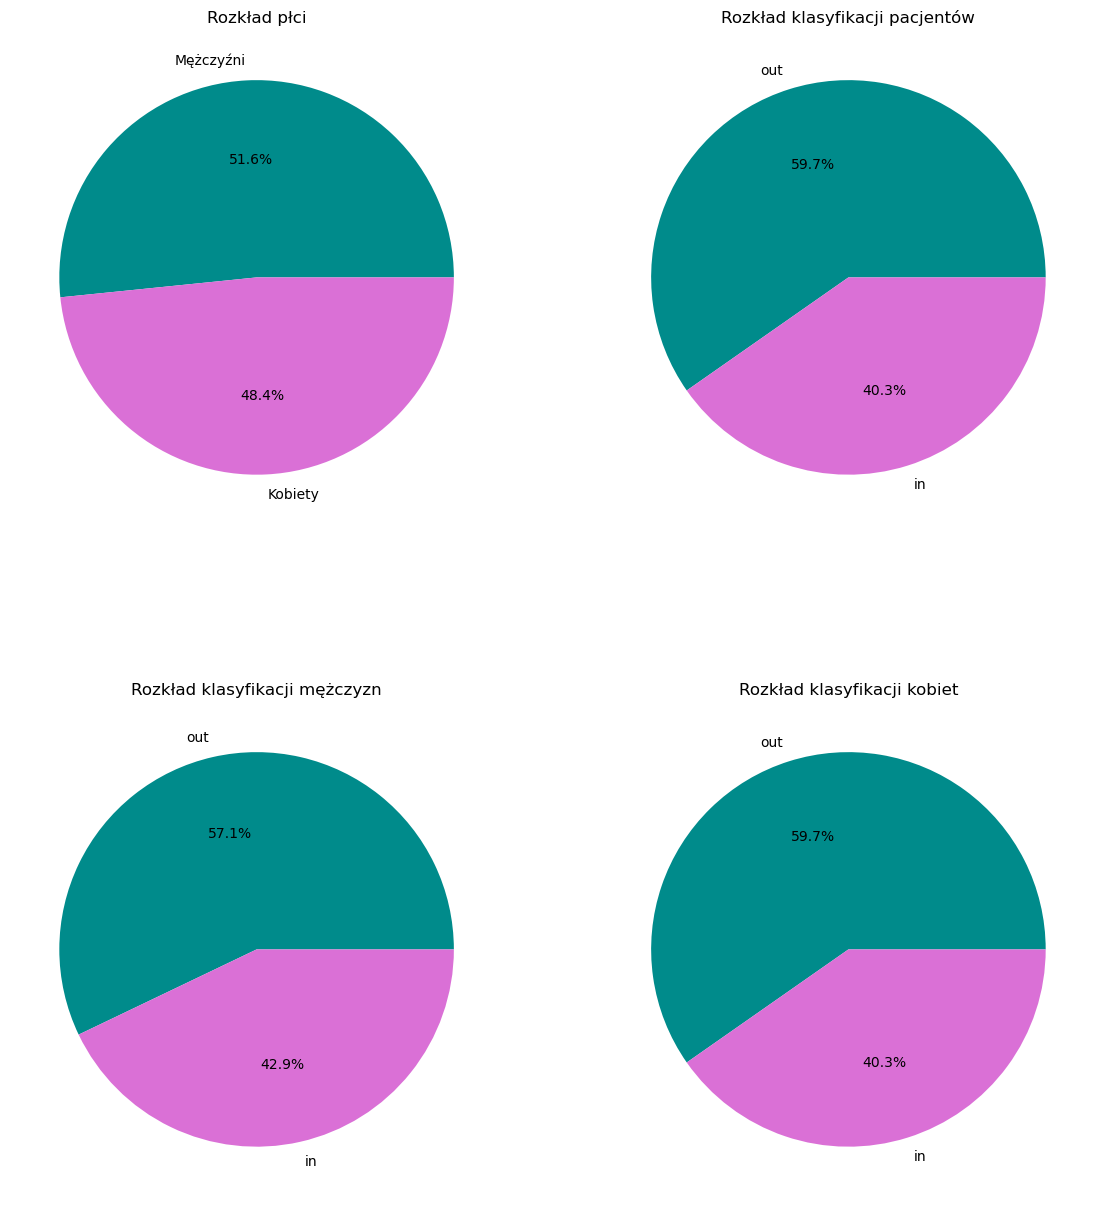

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(14, 16))
ax[0,0].pie(counts_P, labels= ["Mężczyźni", "Kobiety"], autopct='%1.1f%%', colors=['darkcyan', 'orchid']);
ax[0,0].set_title("Rozkład płci");
ax[0,1].pie(counts_S, labels= ["out", "in"], autopct='%1.1f%%', colors=['darkcyan', 'orchid']);
ax[0,1].set_title("Rozkład klasyfikacji pacjentów");
ax[1,0].pie(counts_M, labels= ["out", "in"], autopct='%1.1f%%', colors=['darkcyan', 'orchid']);
ax[1,0].set_title("Rozkład klasyfikacji mężczyzn");
ax[1,1].pie(counts_S, labels= ["out", "in"], autopct='%1.1f%%', colors=['darkcyan', 'orchid']);
ax[1,1].set_title("Rozkład klasyfikacji kobiet");

Możemy zauważyć, że obie płcie są mniej więcej równoliczne oraz, że więcej osób jest nieklasyfikowane do dalszego pobytu w szpitalu.

Następnie przeanalizujemy kolumny, w których znajdują się wartości numeryczne.

In [25]:
dane.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.0000,3912.000000,3912.000000
mean,38.195015,12.739980,4.539926,8.740389,258.221881,28.238574,33.3432,84.626687,46.482618
std,5.983047,2.077783,0.784036,5.141133,114.613949,2.662162,1.2275,6.842860,21.691798
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.0000,54.000000,1.000000
25%,34.400000,11.400000,4.047500,5.600000,189.000000,27.200000,32.7000,81.600000,29.000000
50%,38.700000,12.900000,4.570000,7.600000,256.000000,28.700000,33.4000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.400000,321.000000,29.800000,34.1000,88.725000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.0000,115.600000,98.000000


W zależności od laboratorium występują różnice w normach dla poszczególnych badań. Na wyniki badań może również wpłynąć ciąża, ale nie jest o tym wspomniane w danych, więc pomijamy ten przypadek. Ponieważ nie wiemy, jakie normy obowiązują w szpitalu, z którego pochodzą dane, sprawdzimy jak zostali sklasyfikowani pacjenci, których wszystkie wyniki mieszczą się w normach podanych przez jedno z polskich labolatoriów.

Normy dla poszczególnych badań wyglądają następująco:
* **HEMATOKRYT**: kobiety ~ 37-47$\%$, mężczyźni ~ 40-54$\%$, dzieci ~ 30-45$\%$
* **HEMOGLOBINA**: kobiety ~ 12-16$\ \text{g/dl}$, mężczyźni ~ 14-18$\ \text{g/dl}$, dzieci ~ 10-15$\ \text{g/dl}$
* **ERYTROCYTY**: kobiety ~ 4.2-5.4$\ \text{mln/mm}^3$, mężczyźni ~ 3.5-5.2$\ \text{mln/mm}^3$, dzieci ~ 3.5-5.4$\ \text{mln/mm}^3$
* **LEUKOCYTY**: 4-10$\ \text{tys./}\mu \text{l}$
* **TROMBOCYTY**: 150-450$\ \text{tys./}\mu \text{l}$
* **MCH**: dorośli ~ 27-33$\ \text{pg}$, dzieci ~ 25-32$\ \text{pg}$
* **MCHC**: 32-36$\ \text{g/dl}$
* **MCV**: dorośli ~ 80-99$\ \text{fl}$, dzieci ~ 74-93$\ \text{fl}$

In [26]:
dane[dane["HAEMATOCRIT"] == 69]

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
2432,69.0,12.1,4.04,6.2,307,30.0,34.8,86.1,69,M,out


In [38]:
dane[dane["HAEMOGLOBINS"] == 18.9]

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
2177,58.1,18.9,6.53,30.8,428,28.9,32.5,89.0,61,M,out


In [39]:
dane[dane["THROMBOCYTE"] == 1183]

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
1441,43.5,13.7,4.53,17.9,1183,30.2,31.5,96.0,71,F,out


In [27]:
dane[(dane["HAEMATOCRIT"] <= 54) & (dane["HAEMATOCRIT"] >= 40) & (dane["HAEMOGLOBINS"] <= 18) & (dane["HAEMOGLOBINS"] >= 14) & 
     (dane["ERYTHROCYTE"] <= 5.4) & (dane["ERYTHROCYTE"] >= 4.2) & (dane["LEUCOCYTE"] <= 10) & (dane["LEUCOCYTE"] >= 4) & 
     (dane["THROMBOCYTE"] <= 450) & (dane["THROMBOCYTE"] >= 150) & (dane["MCH"] <= 33) & (dane["MCH"] >= 27) & 
     (dane["MCHC"] <= 36) & (dane["MCHC"] >= 32) & (dane["MCV"] <= 99) & (dane["MCV"] >= 80) & (dane["AGE"] >= 18) & 
     (dane["SEX"] == "M")]["SOURCE"].value_counts()

SOURCE
out    309
in      74
Name: count, dtype: int64

In [28]:
dane[(dane["HAEMATOCRIT"] <= 47) & (dane["HAEMATOCRIT"] >= 37) & (dane["HAEMOGLOBINS"] <= 16) & (dane["HAEMOGLOBINS"] >= 12) & 
     (dane["ERYTHROCYTE"] <= 5.2) & (dane["ERYTHROCYTE"] >= 3.5) & (dane["LEUCOCYTE"] <= 10) & (dane["LEUCOCYTE"] >= 4) & 
     (dane["THROMBOCYTE"] <= 450) & (dane["THROMBOCYTE"] >= 150) & (dane["MCH"] <= 33) & (dane["MCH"] >= 27) & 
     (dane["MCHC"] <= 36) & (dane["MCHC"] >= 32) & (dane["MCV"] <= 99) & (dane["MCV"] >= 80) & (dane["AGE"] >= 18) & 
     (dane["SEX"] == "F")]["SOURCE"].value_counts()

SOURCE
out    334
in      74
Name: count, dtype: int64

In [29]:
dane[(dane["HAEMATOCRIT"] <= 45) & (dane["HAEMATOCRIT"] >= 30) & (dane["HAEMOGLOBINS"] <= 15) & (dane["HAEMOGLOBINS"] >= 10) & 
     (dane["ERYTHROCYTE"] <= 5.4) & (dane["ERYTHROCYTE"] >= 3.5) & (dane["LEUCOCYTE"] <= 10) & (dane["LEUCOCYTE"] >= 4) & 
     (dane["THROMBOCYTE"] <= 450) & (dane["THROMBOCYTE"] >= 150) & (dane["MCH"] <= 32) & (dane["MCH"] >= 25) & 
     (dane["MCHC"] <= 36) & (dane["MCHC"] >= 32) & (dane["MCV"] <= 93) & (dane["MCV"] >= 74) & 
     (dane["AGE"] < 18)]["SOURCE"].value_counts()

SOURCE
out    102
in      22
Name: count, dtype: int64

Widzimy, że część pacjentów, których wszystkie wyniki badań mieszczą się w normie, nadal zostaje sklasyfikowana do dalszego pobytu w szpitalu. Można z tego wywnioskować, że normy obowiązujące w szpitalu, z którego pochodzą dane najprawdopodobniej różnią się od norm, które przyjęliśmy.

Sprawdzimy jeszcze dane za pomocą wykresów pudełkowych z podziałem na pacjentów kontynuujących pobyt w szpitalu i pacjentów opuszczających szpital.

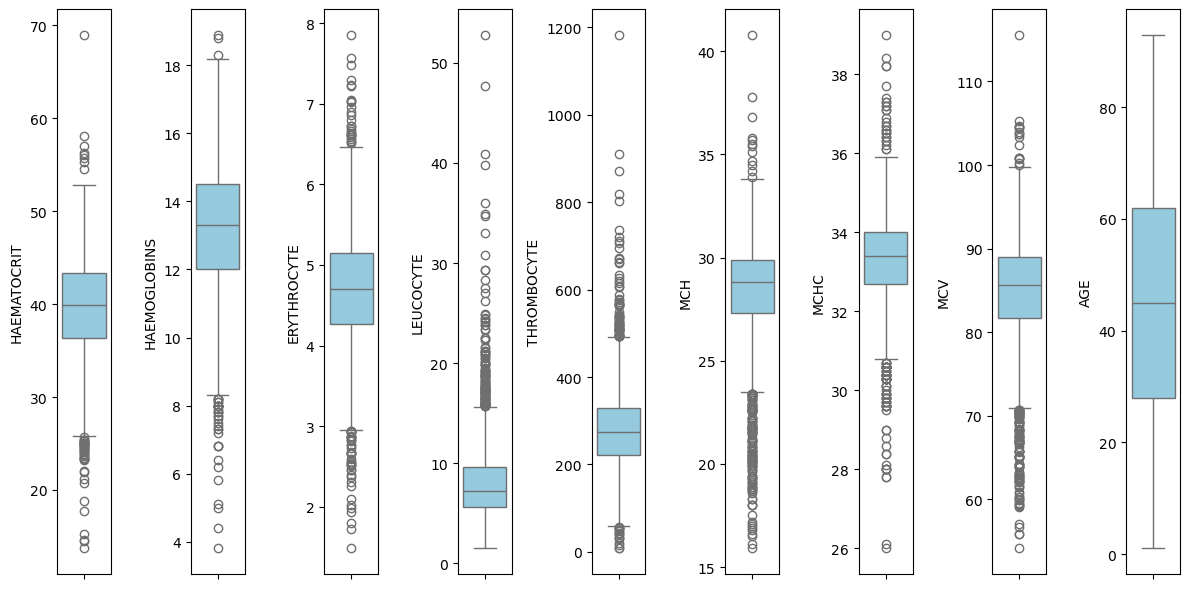

In [30]:
plt.figure(figsize=(12, 6))
numeryczne = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC','MCV', 'AGE']
for i in range(0, len(numeryczne)):
    plt.subplot(1, len(numeryczne), i+1)
    sns.boxplot(y=dane[dane["SOURCE"] == "out"][numeryczne[i]], color='skyblue')
    plt.tight_layout()

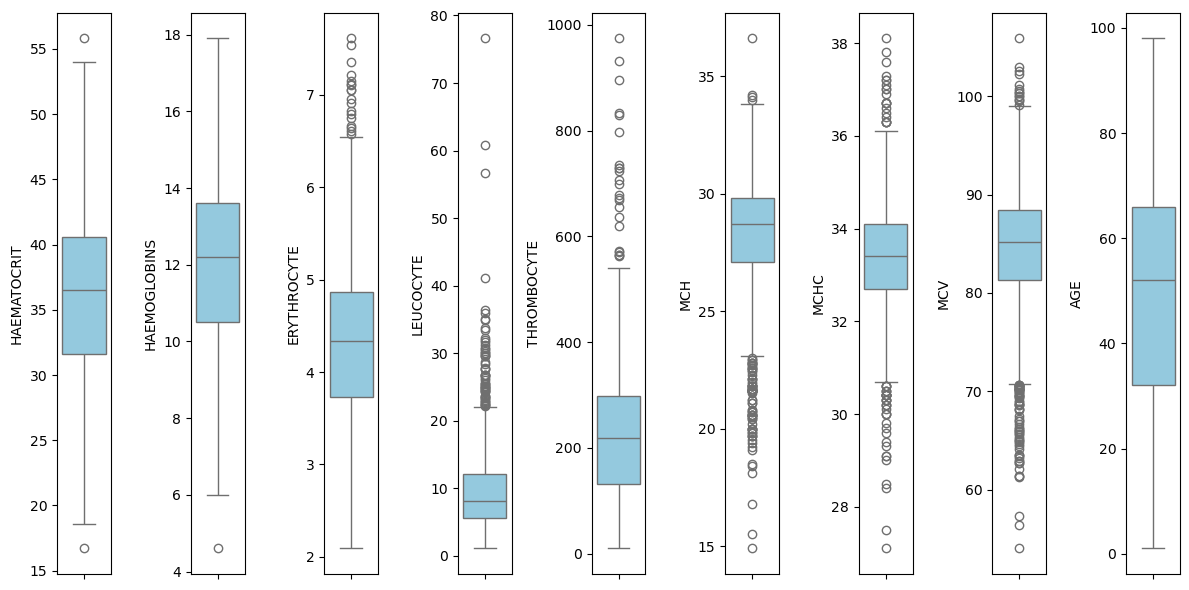

In [31]:
plt.figure(figsize=(12, 6))
for i in range(0, len(dane.columns)-2):
    plt.subplot(1, len(dane.columns)-2, i+1)
    sns.boxplot(y=dane[dane["SOURCE"] == "in"][dane.columns[i]], color='skyblue')
    plt.tight_layout()

Widzimy, że w obu przypadkach pojawiają się wartości znacząco wykraczające poza normę, a średnie wartości są do siebie zbliżone dla obu typów pacjentów.

Sprawdzimy, czy w danych pojawaiają się zduplikowane wiersze, aby upewnić się, że pacjenci z takimi samymi wynikami są inaczej klasyfikowani.

In [44]:
dane[dane[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC','MCV', 'AGE']].duplicated(keep=False)]

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE


# Dalsza analiza

Przedstawimy poszczególne wyniki z podziałem na płcie na histogramach.

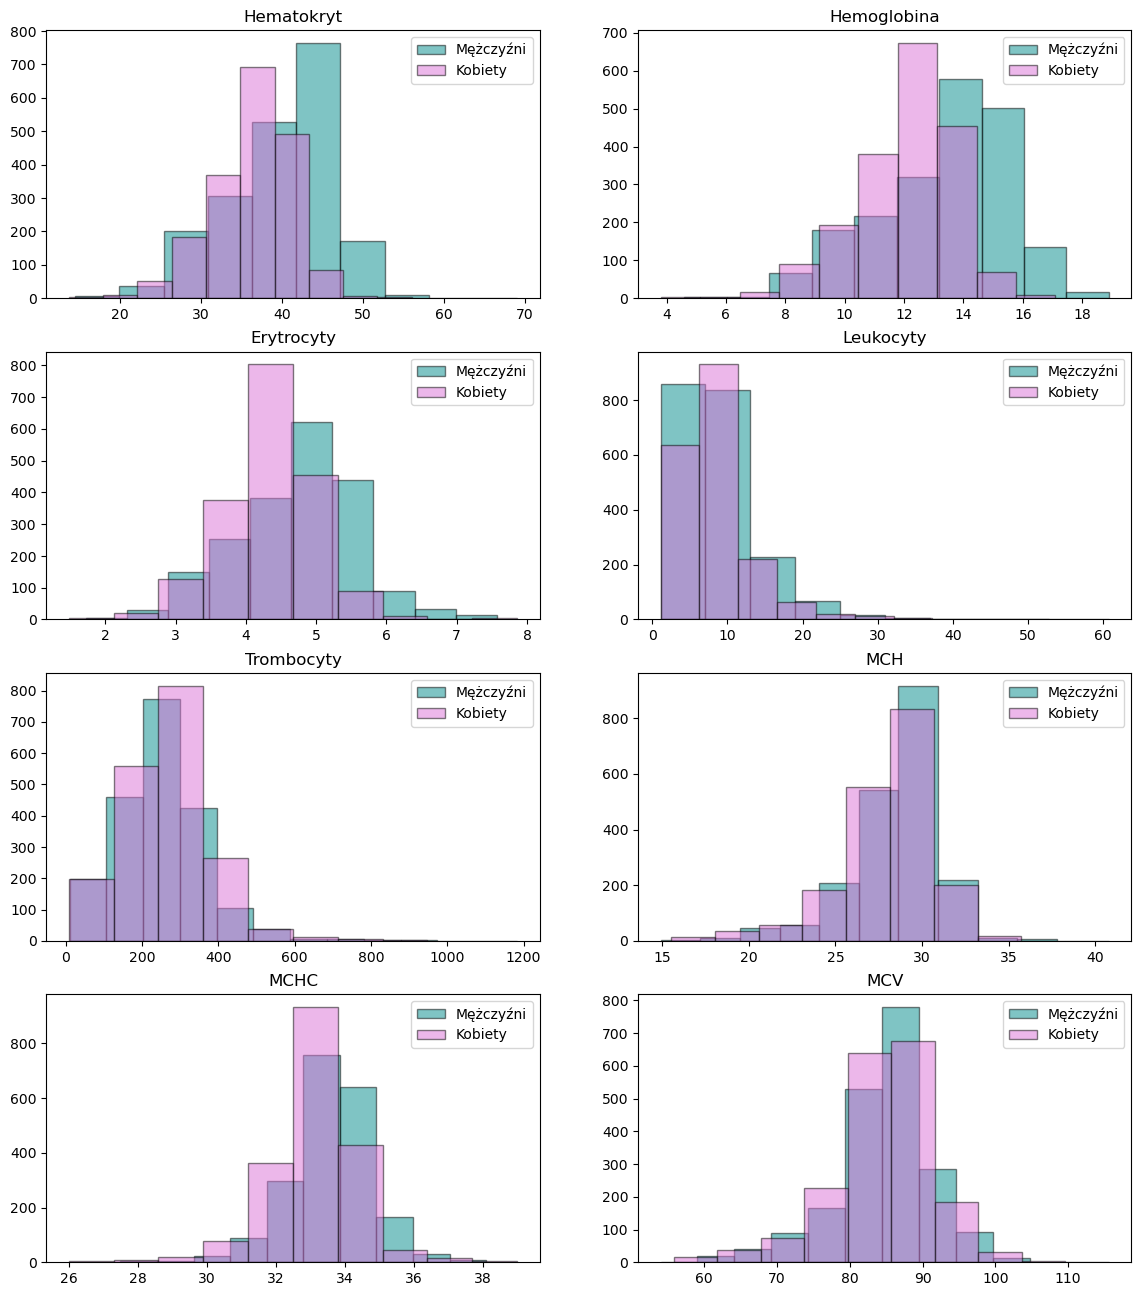

In [48]:
fig, ax = plt.subplots(4, 2, figsize=(14, 16))
ax[0,0].hist((dane[dane["SEX"] == "M"])["HAEMATOCRIT"],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Mężczyźni")
ax[0,0].hist((dane[dane["SEX"] == "F"])["HAEMATOCRIT"], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Kobiety")
ax[0,0].set_title("Hematokryt")
ax[0,0].legend();

ax[0,1].hist((dane[dane["SEX"] == "M"])["HAEMOGLOBINS"],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Mężczyźni")
ax[0,1].hist((dane[dane["SEX"] == "F"])["HAEMOGLOBINS"], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Kobiety")
ax[0,1].set_title("Hemoglobina")
ax[0,1].legend();

ax[1,0].hist((dane[dane["SEX"] == "M"])["ERYTHROCYTE"],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Mężczyźni")
ax[1,0].hist((dane[dane["SEX"] == "F"])["ERYTHROCYTE"], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Kobiety")
ax[1,0].set_title("Erytrocyty")
ax[1,0].legend();

ax[1,1].hist((dane[(dane["SEX"] == "M") & (dane["LEUCOCYTE"] < 70)])["LEUCOCYTE"],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Mężczyźni")
ax[1,1].hist((dane[(dane["SEX"] == "F") & (dane["LEUCOCYTE"] < 70)])["LEUCOCYTE"], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Kobiety")
ax[1,1].set_title("Leukocyty")
ax[1,1].legend();

ax[2,0].hist((dane[dane["SEX"] == "M"])["THROMBOCYTE"],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Mężczyźni")
ax[2,0].hist((dane[dane["SEX"] == "F"])["THROMBOCYTE"], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Kobiety")
ax[2,0].set_title("Trombocyty")
ax[2,0].legend();

ax[2,1].hist((dane[dane["SEX"] == "M"])["MCH"],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Mężczyźni")
ax[2,1].hist((dane[dane["SEX"] == "F"])["MCH"], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Kobiety")
ax[2,1].set_title("MCH")
ax[2,1].legend();

ax[3,0].hist((dane[dane["SEX"] == "M"])["MCHC"],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Mężczyźni")
ax[3,0].hist((dane[dane["SEX"] == "F"])["MCHC"], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Kobiety")
ax[3,0].set_title("MCHC")
ax[3,0].legend();

ax[3,1].hist((dane[dane["SEX"] == "M"])["MCV"],color = 'darkcyan',alpha = 0.5,edgecolor = "black",label = "Mężczyźni")
ax[3,1].hist((dane[dane["SEX"] == "F"])["MCV"], color = 'orchid',alpha = 0.5,edgecolor = "black",label = "Kobiety")
ax[3,1].set_title("MCV")
ax[3,1].legend();


**WNIOSKI**

* Średnie wartości dla hematokrytów, hemoglobiny oraz erytrocytów dla mężczyzn są wyższe, co zgadza się z teorią,
* Pozostałe parametry mają podobną średnią w przypadku obu płci.

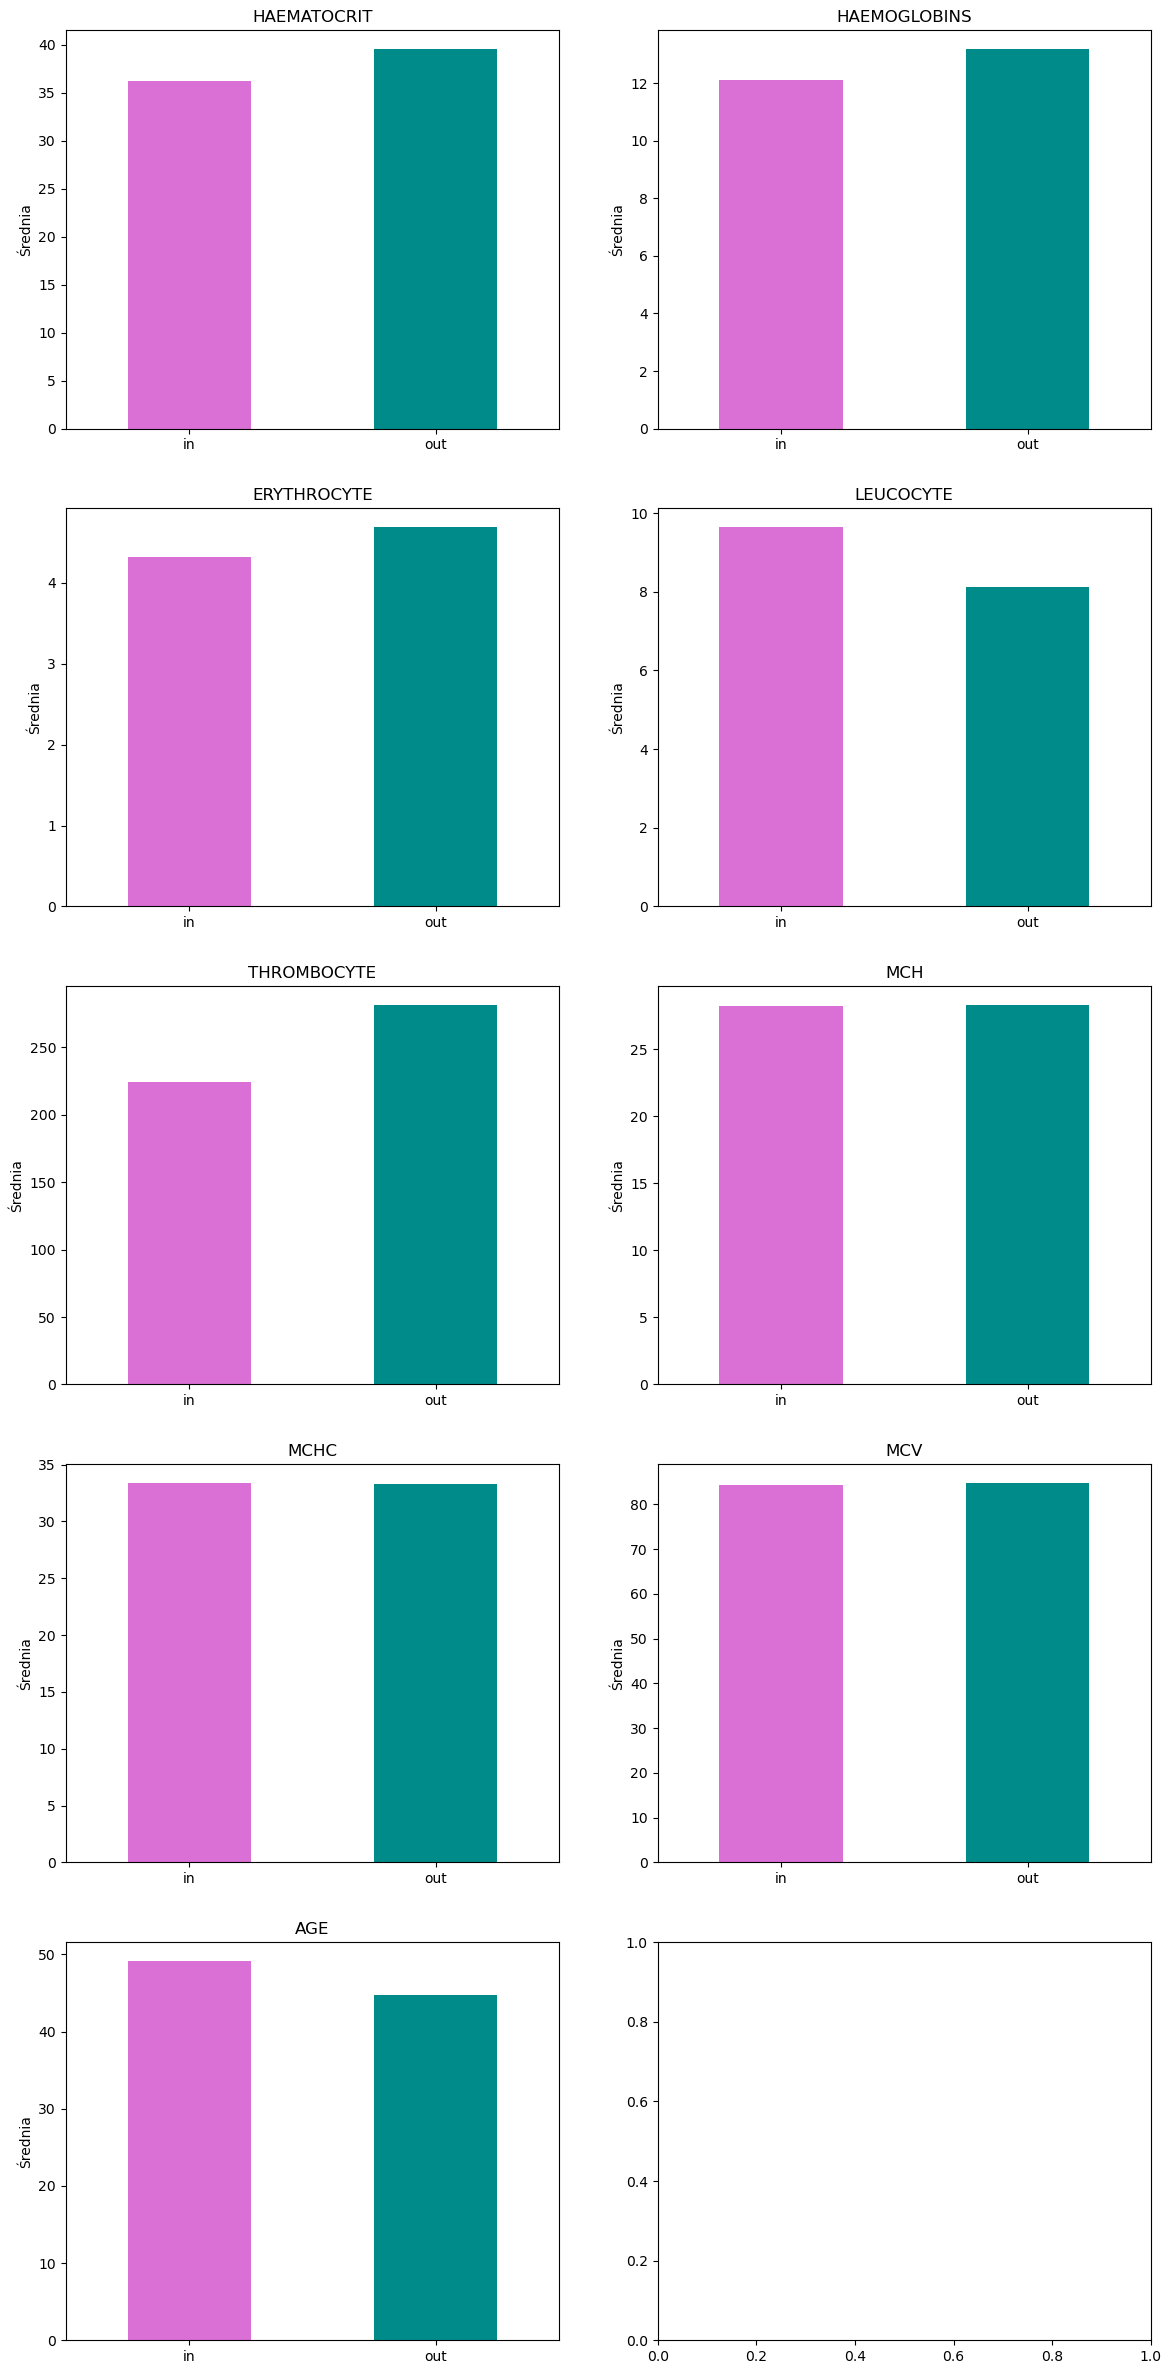

In [47]:
fig, axes = plt.subplots(5,2, figsize=(14,30))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(dane[numeryczne]):
    df = dane.groupby("SOURCE")[c].mean()
    plot = df.plot(kind='bar', title=c, ax=axes[i], ylabel='Średnia', color=('orchid','darkcyan'), xlabel = "")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

**WNIOSKI**

* Dla hemokrytów, hemoglobiny, erytrocytów i trombocytów średnie wartości wyników są niższe dla pacjentów, którzy zostali skasyfikowani do dalszego pobytu w szpitalu, a w leukocytach mamy odwrotny przypadek,
* Dla MCH, MCHC, MCV średnie wartości wyników nie różnią się znacząco dla obu klas,
* Średni wiek pacjentów pozostawionych w szpitalu na dalsze badania jest wyższy.

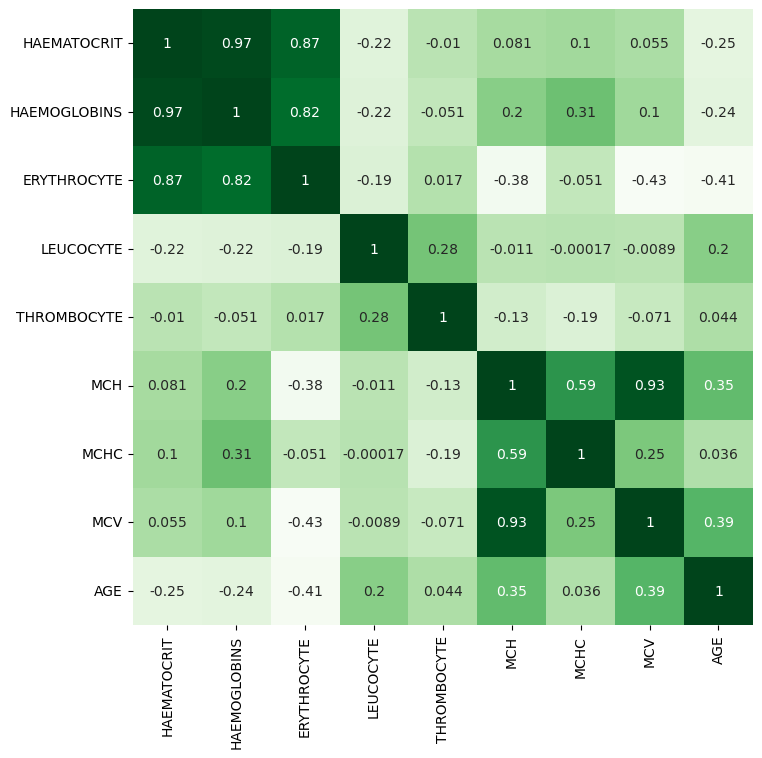

In [34]:
corr_matt = dane[numeryczne].corr(method='pearson')
plt.figure(figsize=(8, 8))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

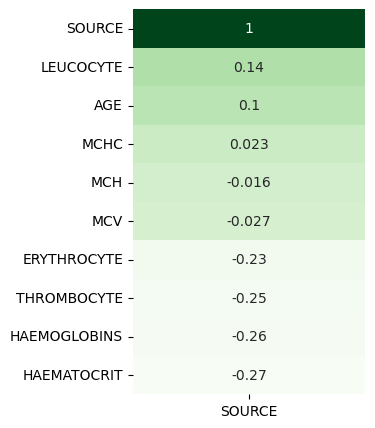

In [35]:
dane['SOURCE'] = dane['SOURCE'].map({'in': 1, 'out': 0})
corr_matt = dane.drop(columns = ['SEX']).corr(method='pearson')[['SOURCE']].sort_values(by='SOURCE',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

**WNIOSKI**

* Leukocyty i wiek są dodatnio skorelowane z kolumną klasyfikacyjną,
* MCHC, MCH i MCV są bliskie zeru, zatem nie ma korelacji między nimi, a ostatnią kolumną,
* Erytrocyty, trombocyty, hemoglobina i hematokryty są ujemnie skorelowane z kolumną 'SOURCE'.